In [5]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set display options
pd.set_option('display.max_columns', None)

In [6]:
# import dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
# real_estate = pd.read_csv('./data/Ames_Real_Estate_Data.csv')

# Basic EDA

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [318]:
housing.sort_values('SalePrice', ascending=False).head(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasGarage,HasPool,PorchTotSF,HasPorch,HasDeck,HasFinBsmt,HasFireplace,HasFence,HasRemod,LogSalePrice
8,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,1,0,50,1,1,1,1,0,1,13.534473
326,528320060,3627,625000,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1831,1796,0,1.0,0.0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3.0,807.0,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,1,0,76,1,1,1,1,0,1,13.345507
66,528164060,2470,615000,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,Ex,7,Typ,2,Gd,Attchd,2003.0,Fin,3.0,789.0,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal,1,1,281,1,1,1,1,0,0,13.329378
585,528150070,2364,611657,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,1,0,67,1,0,1,1,0,1,13.323927
640,528110020,2674,610000,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,2674,0,0,2.0,0.0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2007.0,Fin,3.0,762.0,TA,TA,Y,360,50,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,1,0,50,1,1,1,1,0,0,13.321214


Text(0.5, 1.0, 'Price Distribution')

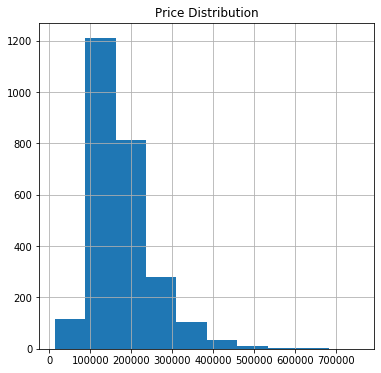

In [305]:
plt.figure(figsize=(6,6))
housing['SalePrice'].hist()
plt.title('Price Distribution')

In [314]:
print('SalePrice Mean: ', np.mean(housing.SalePrice))

upper_lim = np.mean(housing.SalePrice) + 3 * np.std(housing.SalePrice)
lower_lim = np.mean(housing.SalePrice) - 3 * np.std(housing.SalePrice)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

Housing Mean:  178059.62325581396
Outliers are above 403109.26 and below -46990.02


Text(0.5, 1.0, 'Log Price Distribution')

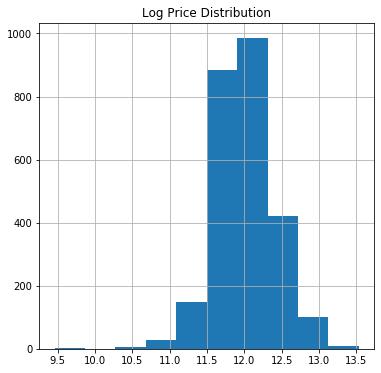

In [306]:
housing['LogSalePrice'] = np.log(housing.SalePrice)
plt.figure(figsize=(6,6))
housing['LogSalePrice'].hist()
plt.title('Log Price Distribution')

In [323]:
print('Log SalePrice Mean: %.1f' % np.mean(housing.LogSalePrice))

upper_lim = np.mean(housing.LogSalePrice) + 3.5 * np.std(housing.LogSalePrice)
lower_lim = np.mean(housing.LogSalePrice) - 3.5 * np.std(housing.LogSalePrice)
print('Outliers are above %.1f and below %.1f' % (upper_lim, lower_lim))

Log SalePrice Mean: 12.0
Outliers are above 13.4 and below 10.7


In [325]:
housing[housing.LogSalePrice > 13.4].sort_values('LogSalePrice', ascending=False)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasGarage,HasPool,PorchTotSF,HasPorch,HasDeck,HasFinBsmt,HasFireplace,HasFence,HasRemod,LogSalePrice
8,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,2444,1872,0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,1,0,50,1,1,1,1,0,1,13.534473


In [324]:
housing[housing.LogSalePrice < 10.7].sort_values('LogSalePrice', ascending=False)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasGarage,HasPool,PorchTotSF,HasPorch,HasDeck,HasFinBsmt,HasFireplace,HasFence,HasRemod,LogSalePrice
741,911102170,1317,40000,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,1,0,226,1,0,0,0,1,1,10.596635
918,534450090,334,39300,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,0,0,0,0,0,0,0,0,1,10.578980
645,911175430,480,35311,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,1,0,0,0,0,1,0,0,1,10.471950
336,909101330,498,35000,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,498.0,498.0,GasA,TA,N,FuseF,498,0,0,0.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,Detchd,1922.0,Unf,1.0,216.0,Fa,Fa,N,0,0,100,0,0,0,NaN,NaN,NaN,0,2,2006,ConLD,Normal,1,0,100,1,0,0,0,0,1,10.463103
559,902477120,720,34900,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,0,0,638,1,0,1,0,1,1,10.460242
428,902207130,832,12789,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml,1,0,0,0,0,0,1,0,1,9.456341


Text(0.5, 1.0, 'Nieghborhood Distribution')

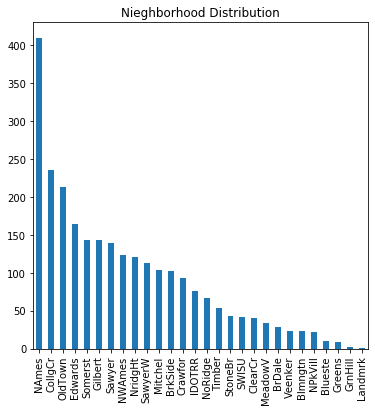

In [5]:
plt.figure(figsize=(6,6))
housing['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Nieghborhood Distribution')

In [6]:
len(housing['Neighborhood'].unique())

28

Text(0.5, 1.0, 'Building Type Distribution')

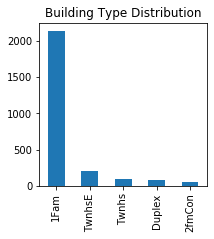

In [7]:
plt.figure(figsize=(3,3))
housing['BldgType'].value_counts().plot(kind='bar')
plt.title('Building Type Distribution')

Text(0.5, 1.0, 'Distribution of Zoning')

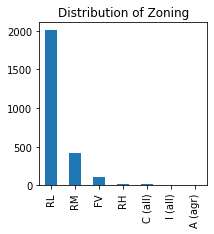

In [8]:
plt.figure(figsize=(3,3))
housing.MSZoning.value_counts().plot(kind='bar')
plt.title('Distribution of Zoning')

In [9]:
housing[housing.MSZoning=='C (all)']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
128,911102180,1049,80900,50,C (all),52.0,5150,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Po,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
167,911175440,1396,115000,190,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,5,6,1951,1951,Gable,CompShg,WdShing,Wd Shng,None,0.0,Fa,Fa,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,660.0,660.0,GasA,TA,N,SBrkr,1060,336,0,0.0,0.0,2,0,4,2,TA,8,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
255,902332030,2291,133900,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046.0,Unf,0.0,168.0,1214.0,GasW,Ex,N,SBrkr,1260,1031,0,0.0,1.0,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2.0,506.0,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal
559,902477120,720,34900,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml
645,911175430,480,35311,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,480,0,0,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
671,911128180,1128,68400,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,698.0,698.0,GasA,TA,Y,FuseA,698,430,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1980.0,RFn,2.0,528.0,TA,TA,Y,30,0,164,0,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml
741,911102170,1317,40000,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,649.0,649.0,GasA,TA,N,SBrkr,649,668,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,250.0,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
835,911226010,894,81000,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,TA,Y,SBrkr,894,0,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3.0,1248.0,TA,TA,Y,0,20,0,0,0,0,NaN

Text(0.5, 1.0, 'Distribution of Functional Feature')

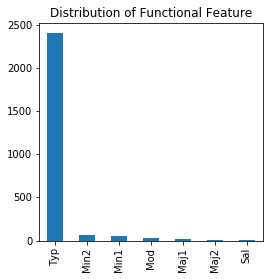

In [10]:
plt.figure(figsize=(4,4))
housing.Functional.value_counts().plot(kind='bar')
plt.title('Distribution of Functional Feature')

In [11]:
housing[housing.Functional=='Sal']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
206,903484080,1484,50000,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,0.0,0.0,2,0,3,1,TA,6,Sal,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


Text(0.5, 1.0, 'Distribution of Sale Types')

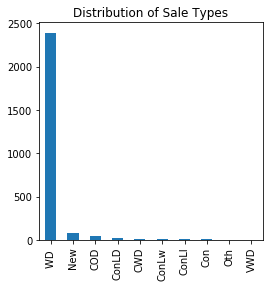

In [67]:
plt.figure(figsize=(4,4))
housing.SaleType.value_counts().plot(kind='bar')
plt.title('Distribution of Sale Types')

Text(0.5, 1.0, 'Distribution of Sale Condition')

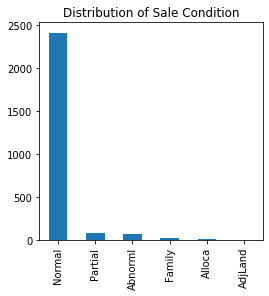

In [12]:
plt.figure(figsize=(4,4))
housing.SaleCondition.value_counts().plot(kind='bar')
plt.title('Distribution of Sale Condition')

In [13]:
housing[~housing.MiscFeature.isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
20,923252075,1091,131250,80,RL,62.0,7706,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,5,1993,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,Gd,TA,Av,Rec,114.0,GLQ,270.0,0.0,384.0,GasA,Ex,Y,SBrkr,1091,0,0,0.0,1.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1993.0,Fin,1.0,429.0,TA,TA,Y,280,0,0,0,0,0,NaN,NaN,Shed,700,8,2009,WD,Normal
29,534128010,2090,200000,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
43,535425060,1312,186000,20,RL,76.0,11355,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,NaN,MnPrv,Othr,6500,4,2008,WD,Normal
51,909176170,2592,150000,90,RL,60.0,10890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,5,6,1923,1950,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,371.0,Unf,0.0,925.0,1296.0,Grav,Fa,N,FuseA,1296,1296,0,2.0,0.0,2,0,6,2,TA,12,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,742,240,0,0,0,NaN,NaN,Shed,1512,1,2007,WD,AdjLand
106,534275170,958,151500,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,909101010,1196,110000,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0.0,Unf,0.0,684.0,684.0,GasA,Gd,Y,SBrkr,684,512,0,0.0,0.0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,2005.0,Unf,2.0,528.0,TA,TA,Y,0,46,0,0,0,0,NaN,GdPrv,Shed,800,8,2009,ConLI,Normal
666,535382130,1466,170000,50,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1936,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,ALQ,626.0,Unf,0.0,170.0,796.0,GasA,Gd,Y,SBrkr,1096,370,0,0.0,1.0,2,0,3,1,Gd,7,Min1,1,TA,Attchd,1950.0,Unf,2.0,566.0,TA,TA,Y,436,21,0,0,0,0,NaN,NaN,Shed,500,4,2006,WD,Normal
679,903231070,1176,114500,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,TA,Y,SBrkr,816,0,360,0.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2.0,528.0,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,Shed,4

In [14]:
housing[housing.MiscVal > 5000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
43,535425060,1312,186000,20,RL,76.0,11355,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,NaN,MnPrv,Othr,6500,4,2008,WD,Normal
106,534275170,958,151500,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal
527,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
290,533352075,2620,190000,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal


In [46]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HasGarage,HasPool,PorchTotSF,HasPorch,HasDeck,HasFinBsmt,HasFireplace,HasFence
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372,0.950388,0.003488,88.011240,0.694574,0.482558,0.699612,0.518992,0.203488
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333,0.217185,0.058971,107.336788,0.460677,0.499793,0.458515,0.499736,0.402671
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.000000,0.000000,50.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000,0.000000,133.250000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,18

# Advanced EDA

### Compare housing prices by whether they have a pool, garage, porch, etc.

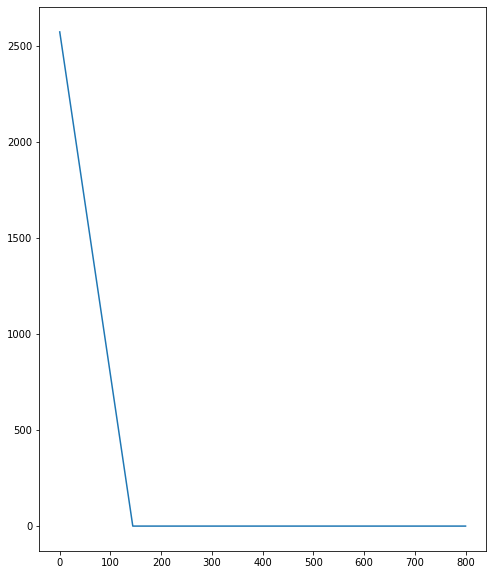

In [110]:
# plt.figure(figsize=(3,3))
housing['PoolArea'].fillna(0).value_counts().sort_index().plot()
# plt.title('Pool Area Distribution')

Text(0.5, 1.0, 'Fence Quality Distribution')

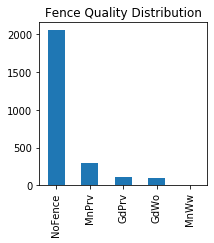

In [69]:
plt.figure(figsize=(3,3))
housing['Fence'].fillna('NoFence').value_counts().plot(kind='bar')
plt.title('Fence Quality Distribution')

Text(0.5, 1.0, 'Deck Distribution')

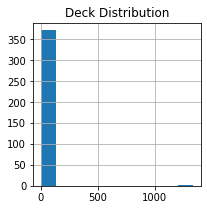

In [84]:
plt.figure(figsize=(3,3))
housing['WoodDeckSF'].fillna(0).value_counts().hist()
plt.title('Deck Distribution')

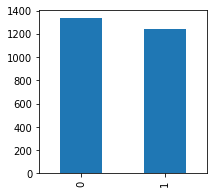

In [95]:
plt.figure(figsize=(3,3))
pd.DataFrame(np.where(housing.WoodDeckSF > 0, 1, 0))[0].value_counts().plot(kind='bar')
# plt.title('Basment Distribution')

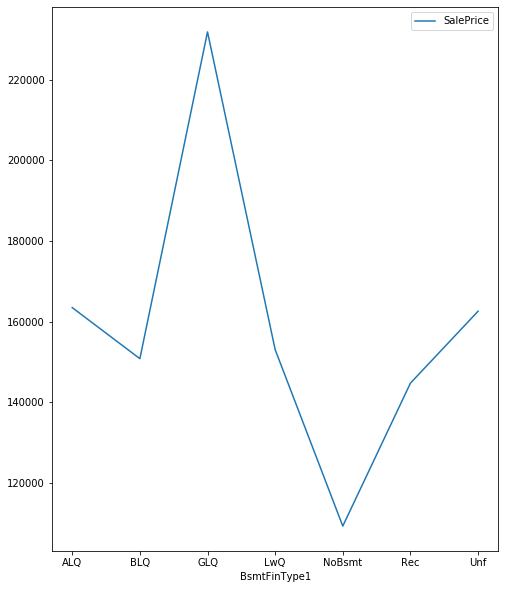

In [80]:
housing['BsmtFinType1'].fillna('NoBsmt', inplace=True)
housing.groupby('BsmtFinType1').agg({'SalePrice':'mean'}).plot()

Text(0.5, 1.0, 'Fireplace Count Distribution')

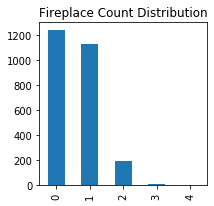

In [76]:
plt.figure(figsize=(3,3))
housing['Fireplaces'].fillna(0).value_counts().plot(kind='bar')
plt.title('Fireplace Count Distribution')

Text(0.5, 1.0, 'Fence Quality Distribution')

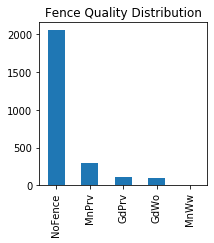

In [73]:
plt.figure(figsize=(3,3))
housing['Fence'].fillna('NoFence').value_counts().plot(kind='bar')
plt.title('Fence Quality Distribution')

In [10]:
housing['HasGarage'] = np.where(housing.GarageCars > 0, 1, 0)
housing['HasPool'] = np.where(housing.PoolArea > 0, 1, 0)
housing['PorchTotSF'] = housing.OpenPorchSF + housing.EnclosedPorch + housing['3SsnPorch'] + housing.ScreenPorch
housing['HasPorch'] = np.where(housing.PorchTotSF > 0, 1, 0)
housing['HasDeck'] = np.where(housing.WoodDeckSF > 0, 1, 0)
housing['HasFinBsmt'] = np.where(housing.BsmtFinSF1 > 0, 1, 0)
housing['HasFireplace'] = np.where(housing.Fireplaces > 0, 1, 0)
housing['HasFence'] = np.where(housing.Fence.notna(), 1, 0)

In [17]:
housing.HasFinBsmt.mean()

0.6996124031007752

In [2]:
cols = ['HasGarage', 'HasPool', 'HasPorch', 'HasDeck', 'HasFinBsmt', 'HasFireplace', 'HasFence']
for col_ in cols:
    plt.figure(figsize=(3,3))
    housing[col_].value_counts().plot(kind='bar')
    plt.title(col_)

NameError: name 'plt' is not defined

In [100]:
from scipy import stats
for col_ in cols:
    print('Does ' + col_ + ' have a significant effect?\n')
    print(housing.groupby(col_).agg({'SalePrice':['mean','std']})/1000)
    a = housing[housing[col_]==0].SalePrice
    b = housing[housing[col_]==1].SalePrice
    t, p = stats.ttest_ind(a, b)
    print('\nUsing a paired t-test, the t-score is %f, and the p value is %f \n' % (t,p))
    diff_ = np.mean(b-a)/1000
    print('On average, houses with ' + col_ + ' are worth %.0f thousand more dollars.\n' % diff_)

Does HasGarage have a significant effect?

            SalePrice           
                 mean        std
HasGarage                       
0          106.399094  33.223481
1          181.800467  74.728119

Using a paired t-test, the t-score is -11.355537, and the p value is 0.000000 

On average, houses with HasGarage are worth 70 thousand more dollars.

Does HasPool have a significant effect?

          SalePrice            
               mean         std
HasPool                        
0        177.786981   74.571705
1        255.944444  146.843974

Using a paired t-test, the t-score is -3.124844, and the p value is 0.001799 

On average, houses with HasPool are worth 77 thousand more dollars.

Does HasPorch have a significant effect?

           SalePrice           
                mean        std
HasPorch                       
0         145.107386  50.730329
1         192.549781  79.296183

Using a paired t-test, the t-score is -15.460263, and the p value is 0.000000 

On aver

**Conclusion:** All of these features are significantly related to the sale price. Are they correlated?

In [131]:
cols.append('SalePrice')
housing[cols].corr()

,HasGarage,HasPool,HasPorch,HasDeck,HasFinBsmt,HasFireplace,HasFence,SalePrice
HasGarage,1.000000,0.013518,0.065516,0.102761,0.122848,0.190885,0.022375,0.218257
HasPool,0.013518,1.000000,-0.003585,0.034955,-0.004252,0.043802,0.068069,0.061428
HasPorch,0.065516,-0.003585,1.000000,0.040849,-0.058201,0.227319,-0.080791,0.291288
HasDeck,0.102761,0.034955,0.040849,1.000000,0.093031,0.218670,-0.025708,0.308870
HasFinBsmt,0.122848,-0.004252,-0.058201,0.093031,1.000000,0.095134,0.089683,0.176317
HasFireplace,0.190885,0.043802,0.227319,0.218670,0.095134,1.000000,-0.049080,0.480080
HasFence,0.022375,0.068069,-0.080791,-0.025708,0.089683,-0.049080,1.000000,-0.173815
SalePrice,0.218257,0.061428,0.291288,0.308870,0.176317,0.480080,-0.173815,1.000000


**Conclusion:** weak correlation b/t HasFireplace and HasDeck and b/t HasFireplace and HasGarage

In [132]:
cols.pop()

'SalePrice'

In [133]:
cols

['HasGarage',
 'HasPool',
 'HasPorch',
 'HasDeck',
 'HasFinBsmt',
 'HasFireplace',
 'HasFence']

### Double Checking the Value Increase with Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression

y = housing['SalePrice']
y = np.log(y)
x1 = housing[cols]
x1['GrLivArea'] = np.log(housing.GrLivArea)


lr = LinearRegression().fit(x1, y)

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
from math import exp

print('Log Intercept:', lr.intercept_)
print('Linear Inercept:    ', exp(lr.intercept_))
print('Log Coeffiecients:', list(zip(x1.columns,lr.coef_)))
print('Linear Coefficients:', list(zip(x1.columns, [round(x) for x in list(map(lambda x: x - exp(lr.intercept_), list(map(exp, lr.coef_ + lr.intercept_))))] )))
# x = list(map(exp, lr.coef_+lr.intercept_))
# type(lr.coef_)

Log Intercept: 6.398417472589281
Linear Inercept:     600.8933548335073
Log Coeffiecients: [('HasGarage', 0.21471381511987986), ('HasPool', 0.05323523981684219), ('HasPorch', 0.06971230835945529), ('HasDeck', 0.11530532849245301), ('HasFinBsmt', 0.16659333878912383), ('HasFireplace', 0.10468427078660787), ('HasFence', -0.07542222219855849), ('GrLivArea', 0.710315201332363)]
Linear Coefficients: [('HasGarage', 144), ('HasPool', 33), ('HasPorch', 43), ('HasDeck', 73), ('HasFinBsmt', 109), ('HasFireplace', 66), ('HasFence', -44), ('GrLivArea', 622)]


Text(0.5, 0, 'Relative Log Weight')

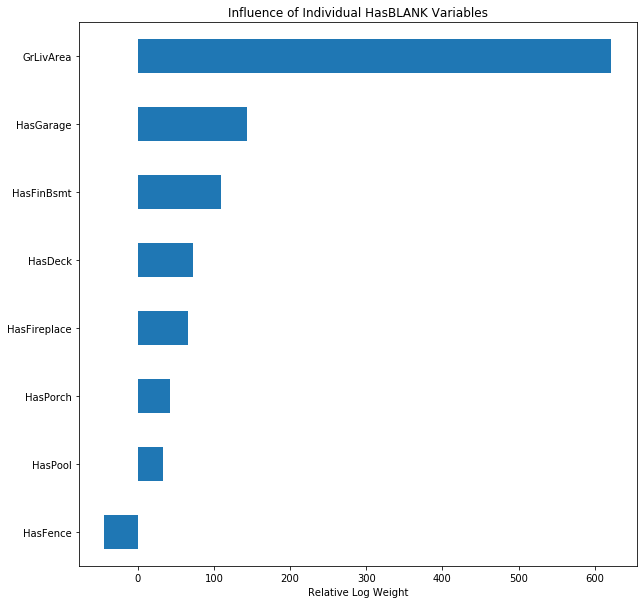

In [154]:
z = pd.DataFrame(index=x1.columns, data=[round(x) for x in list(map(lambda x: x - exp(lr.intercept_), list(map(exp, lr.coef_ + lr.intercept_))))])
plt.figure(figsize=(10,10))
z.sort_values(0, ascending=True)[0].plot(kind='barh')
plt.title('Influence of Individual HasBLANK Relative to House Area')
plt.xlabel('Relative Log Weight')

In [184]:
np.sum(list(map(lambda x: x - exp(lr.intercept_), list(map(exp, lr.coef_ + lr.intercept_))))) + exp(lr.intercept_)

191292.77181787527

In [149]:
np.mean(list(map(exp,y)))

178059.62325581396

**Conclusion:** We found the linear contributions of all the HasBlank variables. The upper end of the model overshoots a little, which suggests that most houses don't have all of them at once. Worth considering multicollinearity.

### Check for Non-Linear Combinations of HasBLANK 

In [66]:
np.sum(housing['HasPool'])

9

In [157]:
cols

['HasGarage',
 'HasPool',
 'HasPorch',
 'HasDeck',
 'HasFinBsmt',
 'HasFireplace',
 'HasFence']

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Dropping column: 'HasGarageHasPool' for providing no new information
Dropping column: 'HasPoolHasPorch' with less than 8 observations
Dropping column: 'HasPoolHasDeck' with less than 8 observations
Dropping column: 'HasPoolHasFinBsmt' with less than 8 observations
Dropping column: 'HasPoolHasFireplace' with less than 8 observations
Dropping column: 'HasPoolHasFence' with less than 8 observations


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002182C3C7048>,
      dtype=object)

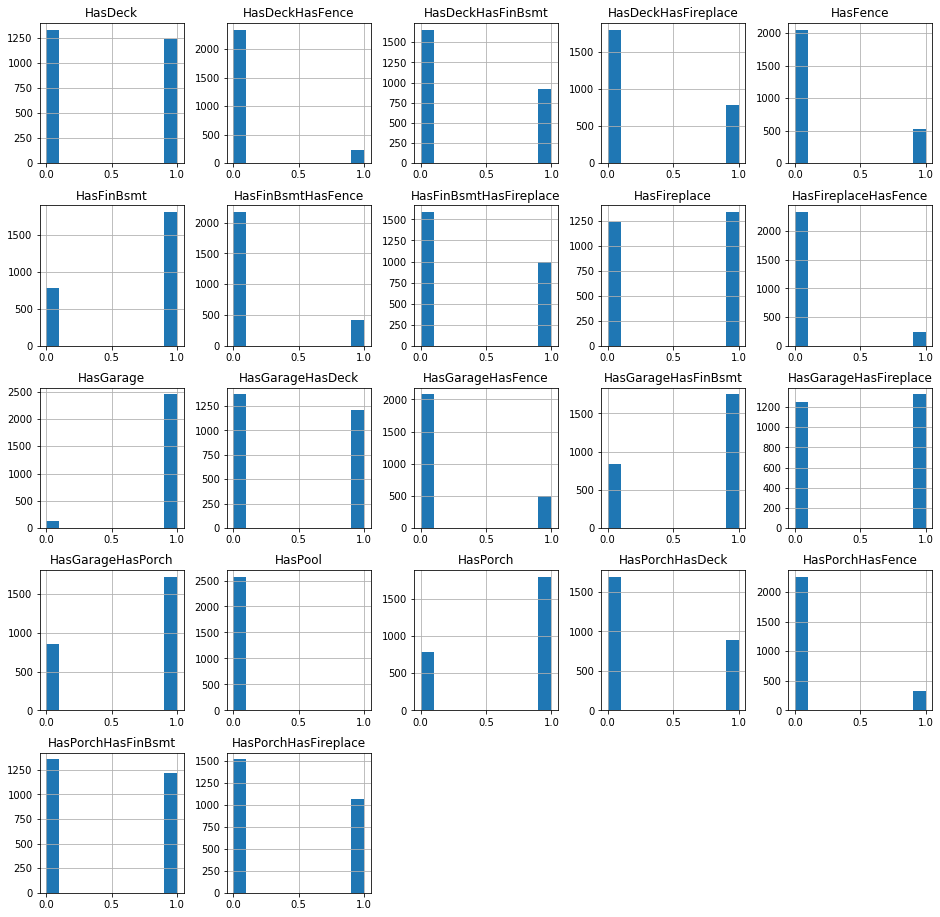

In [156]:
x2 = housing[cols]
i = 1
n = 8
for col1 in cols:    # generate interaction columns
    for col2 in cols[i:]:
        new_col = col1 + col2
        x2[new_col] = x2[col1] * x2[col2]
        # drop if no new information
        new_sum = np.sum(x2[new_col])
        if (new_sum == np.sum(x2[col1])) or (new_sum == np.sum(x2[col2])):
            x2 = x2.drop(new_col, axis=1)
            print("Dropping column: '%s' for providing no new information" % new_col)
        elif (new_sum < 9):
            x2 = x2.drop(new_col, axis=1)
            print("Dropping column: '%s' with less than %i observations" % (new_col, n))
    i = i+1
        
x2.hist(figsize=(16,16))

In [140]:
from sklearn.linear_model import LinearRegression

x2['GrLivArea'] = np.log(housing['GrLivArea'])
y = housing['SalePrice']
y = np.log(y)

lr2 = LinearRegression().fit(x2, y)

In [141]:
from math import exp

print('Log Intercept:', lr2.intercept_)
print('Linear Inercept:    ', exp(lr2.intercept_))
print('Log Coeffiecients:', list(zip(x2.columns,lr2.coef_)))
print('Linear Coefficients:', list(zip(x2.columns, [round(x) for x in list(map(lambda x: x - exp(lr2.intercept_), list(map(exp, lr2.coef_ + lr2.intercept_))))] )))
# x = list(map(exp, lr.coef_+lr.intercept_))
# type(lr.coef_)

Log Intercept: 6.452876517945222
Linear Inercept:     634.524892425021
Log Coeffiecients: [('GrLivArea', 0.7080037717216333), ('HasGarage', 0.13808156322530787), ('HasPool', 0.0708160342702334), ('HasPorch', 0.016120777584482993), ('HasDeck', 0.07703684746179101), ('HasFinBsmt', 0.1813986092547553), ('HasFireplace', 0.03633038010822513), ('HasFence', 0.05622283152670135), ('HasGarageHasPorch', 0.07686057228535356), ('HasGarageHasDeck', -0.003216800197201451), ('HasGarageHasFinBsmt', 0.04028214922483688), ('HasGarageHasFireplace', 0.06050674979545633), ('HasGarageHasFence', -0.0003404466578545404), ('HasPorchHasDeck', 0.03931895329655061), ('HasPorchHasFinBsmt', -0.047423315516044444), ('HasPorchHasFireplace', 0.0534495647561533), ('HasPorchHasFence', -0.10993058877009063), ('HasDeckHasFinBsmt', 0.003898576527737207), ('HasDeckHasFireplace', 0.02750668216683896), ('HasDeckHasFence', -0.049231503886305095), ('HasFinBsmtHasFireplace', -0.04156962773651259), ('HasFinBsmtHasFence', -0.01218

Text(0.5, 0, 'Effect on Sale Price')

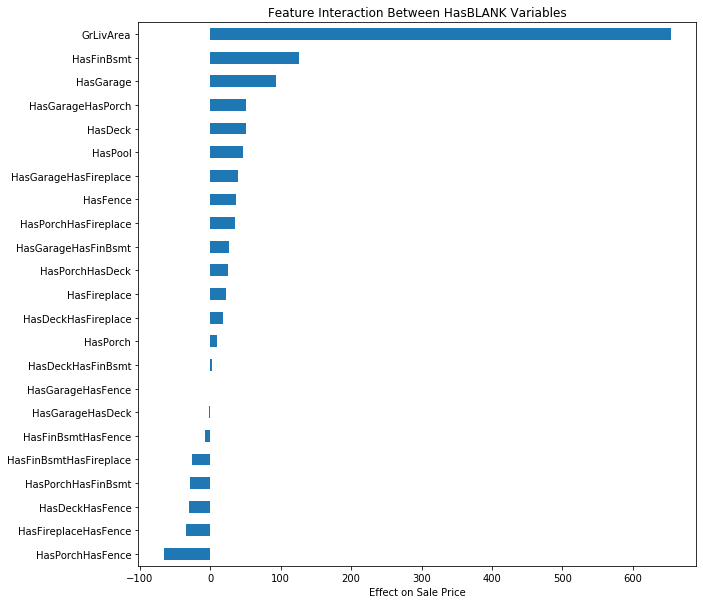

In [142]:
z = pd.DataFrame(index=x2.columns, data=[round(x) for x in list(map(lambda x: x - exp(lr2.intercept_), list(map(exp, lr2.coef_ + lr2.intercept_))))])
plt.figure(figsize=(10,10))
z.sort_values(0, ascending=True)[0].plot(kind='barh')
plt.title('Feature Interaction Between HasBLANK Relative to House Area')
plt.xlabel('Relative Log Weight')

In [139]:
['GrLivArea'], [el_ for el_ in cols]

(['GrLivArea'],
 ['HasGarage',
  'HasPool',
  'HasPorch',
  'HasDeck',
  'HasFinBsmt',
  'HasFireplace',
  'HasFence'])

In [131]:
cols.copy()

['HasGarage',
 'HasPool',
 'HasPorch',
 'HasDeck',
 'HasFinBsmt',
 'HasFireplace',
 'HasFence']

### Compare attached vs detached garages:

In [19]:
housing_garages = housing[['GrLivArea','SalePrice','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]
housing_garages = housing_garages.dropna()

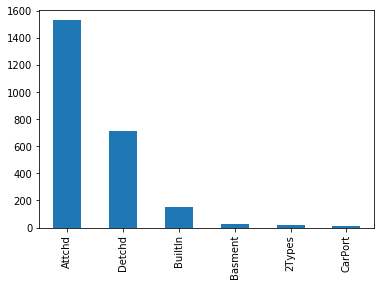

In [20]:
housing_garages.GarageType.value_counts().plot(kind='bar')

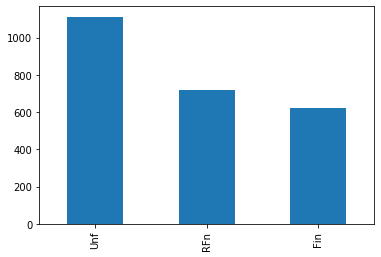

In [21]:
housing_garages.GarageFinish.value_counts().plot(kind='bar')

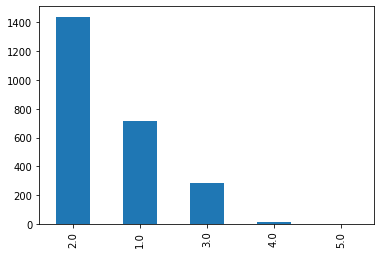

In [22]:
housing_garages.GarageCars.value_counts().plot(kind='bar')

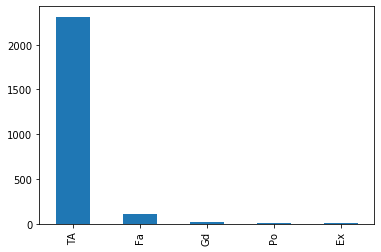

In [23]:
housing_garages.GarageQual.value_counts().plot(kind='bar')

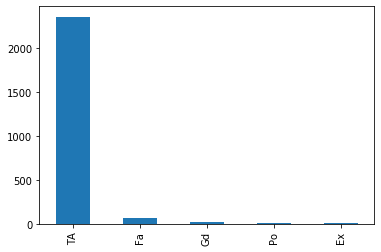

In [24]:
housing_garages.GarageCond.value_counts().plot(kind='bar')

In [25]:
housing_garages_dummified = pd.get_dummies(housing_garages).drop(['GarageType_Attchd','GarageFinish_Unf','GarageQual_TA','GarageCond_TA'], axis=1)
y = housing_garages_dummified['SalePrice']
y = np.log(y)
housing_garages_dummified.drop('SalePrice', axis=1, inplace=True)
housing_garages_dummified['GrLivArea'] = np.log(housing_garages_dummified['GrLivArea'])
x = housing_garages_dummified

In [26]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x, y)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

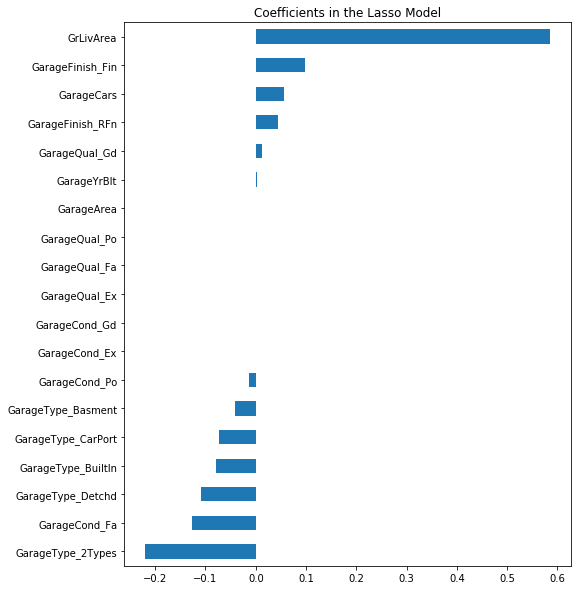

In [27]:
coef = pd.Series(lasso.coef_, index = x.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

**Conclusions:** Lasso penalized regression eliminates several garage varaibles, including the garage area, garage year built, and most interestingly, the garage *quality*. The most important positive varaibles are the number of cars and whether the garage is finished or not (consider combining Fin + RFN). The most important negative variables are unattached garages (consider combining all unattached) and having a fair/poor garage condition (consider combining).

### Compare Annual Sale Price with Mortgage Rates

Text(0.5, 1.0, 'Monthly Sale Price')

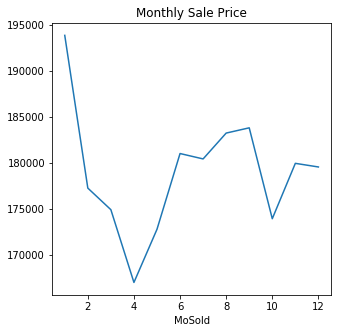

In [28]:
plt.figure(figsize=(5,5))
housing.groupby('MoSold').agg({'SalePrice':'mean'})['SalePrice'].plot()
plt.title('Monthly Sale Price')

In [29]:
mo_sale = housing.groupby('MoSold').agg({'SalePrice':'mean'}).sort_values('SalePrice', ascending=False).reset_index()
mo_sale.index.names = ['DescOrder']
mo_sale

,MoSold,SalePrice
DescOrder,,
0,1,193856.227723
1,9,183824.374046
2,8,183253.896373
3,6,181035.041394
4,7,180449.995000
5,11,179970.948718
6,12,179577.244186
7,2,177285.595041
8,3,174941.899522


Text(0.5, 0, 'Order')

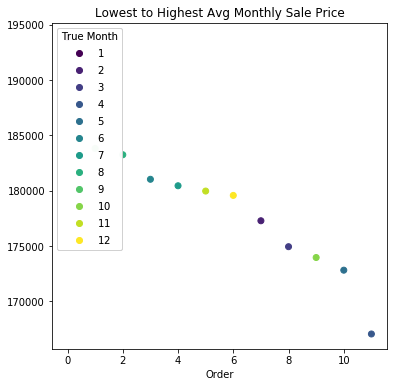

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(mo_sale.index, mo_sale['SalePrice'], c=mo_sale['MoSold'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="True Month")
ax.add_artist(legend1)
plt.title('Lowest to Highest Avg Monthly Sale Price')
plt.xlabel('Order')

In [31]:
FRM = pd.read_csv('data/mortgage_rates.csv')
FRM = FRM.merge(housing.groupby(['YrSold','MoSold']).agg({'SalePrice':'mean'}), left_on=['Year', 'Month'], right_on=['YrSold','MoSold'])

Text(0, 0.5, 'Monthly Average Sale Price')

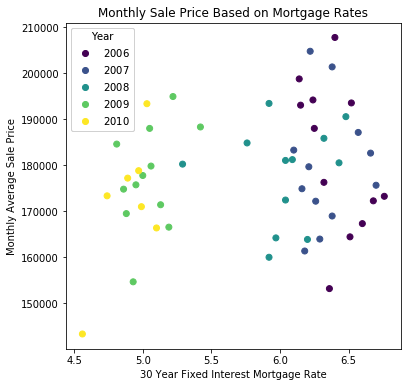

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = plt.scatter(FRM['FRM'], FRM['SalePrice'], c=FRM['Year'])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Year")
ax.add_artist(legend1)
plt.title('Monthly Sale Price Based on Mortgage Rates')
plt.xlabel('30 Year Fixed Interest Mortgage Rate')
plt.ylabel('Monthly Average Sale Price')

Text(0, 0.5, 'Annual Average Sale Price')

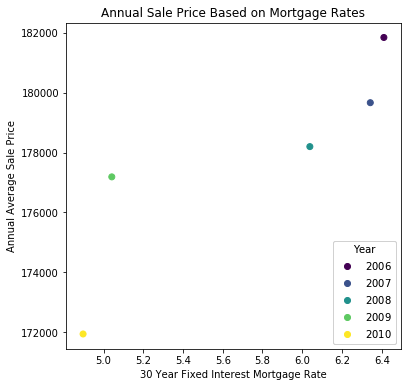

In [33]:
FRM2 = FRM.groupby('Year').agg({'SalePrice':'mean', 'FRM':'mean'})

fig, ax = plt.subplots(figsize = (6,6))
scatter = plt.scatter(FRM2['FRM'], FRM2['SalePrice'], c=list(FRM2.index))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Year")
ax.add_artist(legend1)
plt.title('Annual Sale Price Based on Mortgage Rates')
plt.xlabel('30 Year Fixed Interest Mortgage Rate')
plt.ylabel('Annual Average Sale Price')

**Conclusion:** We can create a re-ordered ordinal column for month and predict when the next best month to buy a house is. In addition, mortgage rates by month are not helpful, but mortgage rates are correlated with price on an annual basis. Unfortunately, the trend is in the opposite direction than we would expect, so it may not be useful.

### EDA on Year Built

In [367]:
housing['BeenRemod'] = np.where(housing.YearRemodAdd != housing.YearBuilt, 1, 0)

In [302]:
housing[['YearBuilt','YearRemodAdd','HasRemod']].sample(5)

,YearBuilt,YearRemodAdd,HasRemod
482,1999,2003,1
961,1972,1972,0
492,2005,2006,1
246,1965,2009,1
416,1920,1997,1


In [268]:
housing_year = housing[housing['HasRemod']==0].groupby('YearBuilt').agg({'SalePrice':['count', 'mean', 'std', 'max', 'min']})
housing_year.head()

SalePrice                                            
              count           mean           std     max    min
YearBuilt                                                      
1950             20  114707.500000  19762.912335  152000  81400
1951             12  126116.666667  22031.375698  155000  81500
1952             10  121840.000000  20835.610542  166000  82000
1953             18  142650.000000  35346.956771  225000  93000
1954             24  132087.125000  27318.649230  224000  93000

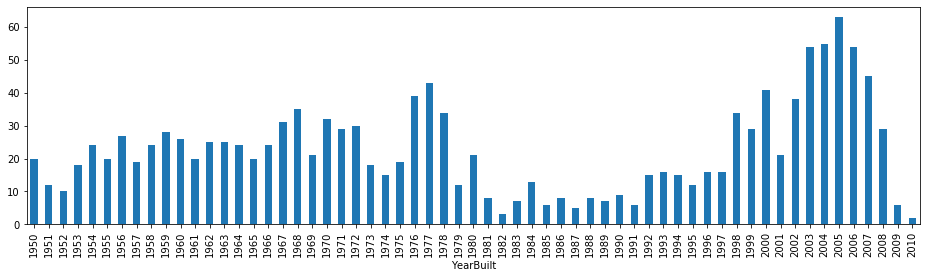

In [259]:
housing_year[('SalePrice','count')].plot(kind='bar', figsize=(16,4))

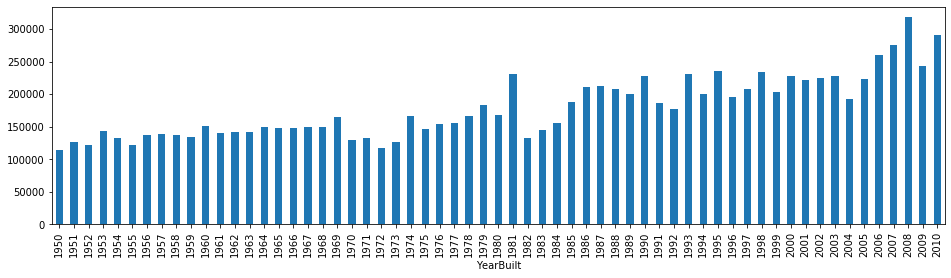

In [253]:
housing_year[('SalePrice','mean')].plot(kind='bar', figsize=(16,4))

**Conclusion:** When taking out the influence of remodeling, there is a strong linear trend between year built and house price.

In [326]:
housing_year_remod = housing[housing['HasRemod']==1].groupby('YearBuilt').agg({'SalePrice':['count', 'mean', 'std', 'max', 'min']})
housing_year_remod.tail()

SalePrice                                              
              count           mean            std     max     min
YearBuilt                                                        
2005             46  258306.413043   97530.676553  468000  142500
2006             26  256709.000000  108055.180942  591587  156932
2007             19  246704.157895   55014.420829  339750  146000
2008              4  275159.000000   69961.360226  378500  224243
2009              3  431949.666667  159315.839126  611657  308030

In [299]:
np.mean(housing_year[('SalePrice','mean')])

179052.3238378395

In [300]:
np.mean(housing_year_remod[('SalePrice','mean')])

173815.14161027843

Why is the mean for remodeled houses lower than not remodeled?

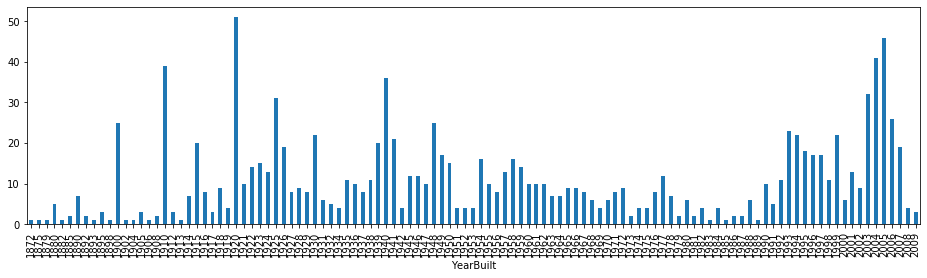

In [261]:
housing_year_remod[('SalePrice','count')].plot(kind='bar', figsize=(16,4))

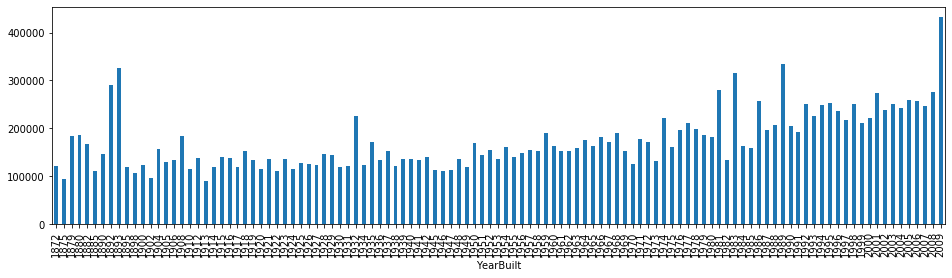

In [304]:
housing_year_remod[('SalePrice','mean')].plot(kind='bar', figsize=(16,4))

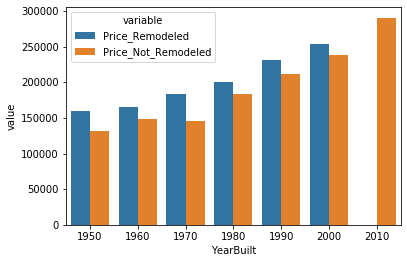

In [303]:
not_remodeled_price = housing[housing.YearRemodAdd==housing.YearBuilt].groupby((housing[housing.YearRemodAdd==housing.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodeled_price = housing[housing.YearRemodAdd!=housing.YearBuilt].groupby((housing[housing.YearRemodAdd!=housing.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodel_and_not = remodeled_price.merge(not_remodeled_price, how = 'right', on='YearBuilt').rename(columns={'SalePrice_x':'Price_Remodeled','SalePrice_y':'Price_Not_Remodeled'})
remodel_and_not = pd.melt(remodel_and_not,id_vars=['YearBuilt'])
sns.barplot(data = remodel_and_not, x='YearBuilt', y='value', hue='variable')

**Conclusion:** there is an outlier year affecting the data (2010). When we ignore 2010, we can see that remodeling does in fact increase the value of the house by ~$30,000. However, there is still some weird imbalancing that is happening. Why are there no houses built before 1950 that have *not* been remodeled?

In [380]:
test = housing[['YearBuilt','BeenRemod']]
test[test.BeenRemod==0]['YearBuilt'].sort_values().unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [379]:
test[test.BeenRemod==1]['YearBuilt'].sort_values().unique()

array([1872, 1875, 1879, 1880, 1882, 1885, 1890, 1892, 1893, 1895, 1898,
       1900, 1902, 1904, 1905, 1906, 1908, 1910, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009], dtype=int64)

### Random forst vs gradient boosting feature importance:

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [35]:
# transofrm the data (if necessary)

In [36]:
# split into train/test

In [37]:
# fit/tune the first model

In [38]:
# fit/tune the second model

In [39]:
# compare feature importances